In [1]:
import pandas as pd , numpy as np

In [2]:
import winsound

def play_sound():
    frequency = 1000  # Frequency in Hertz (1000 Hz is a common beep sound)
    duration = 1000  # Duration in milliseconds (1 second)
    winsound.Beep(frequency, duration)

In [3]:
df=pd.read_csv("C:/Users/RohanRVC/Documents/Business/E-books/E_Books_Unknown_AI/Book/Dataset_collection/Updated_dataset/Final_data1.csv")


MemoryError: 

In [4]:
df

,Title,Genre,Content,Language
0,The Declaration of Independence of the United ...,History,All of the original files are included in the ...,English
1,The King James Version of the Bible,Religion and Spirituality,Exodus The Third Book of Moses: Called Levitic...,English
2,The Complete Works of William Shakespeare,Drama and Performing Arts,William Shakespeare Contents THE SONNETS ALL’S...,English
3,The Magna Carta,Linguistics and Languages,preparer of the 0.1 version. some of which wer...,English
4,Apocolocyntosis,Religion and Spirituality,"H. D. Rouse Release date : November 1, ROUSE, ...",English
...,...,...,...,...
11340,A Biographical Sketch of the Life and Characte...,Other,Produced by John Young Le Bourgeois A BIOGRAPH...,English
11341,"Rub iy t of Omar Khayy m, and Sal m n and Abs ...",Linguistics and Languages,by Edward FitzGerald. no cost and with almost ...,English
11342,"Jane Austen, Her Life and Letters: A Family Re...",History,Chapter I AUSTENS AND LEIGHS 1600-1764 At the ...,English
11343,Mr Dooley in Peace and in War,Comics and Graphic Novels,"Graeme Mackreth, DOOLEY In Peace and in War Bo...",English


In [5]:
df[df.Genre=='Romance']

,Title,Genre,Content,Language
68,Happiness and Marriage,Romance,"CHAPTER I. TO BE HAPPY THOUGH MARRIED. ""Some d...",English
261,The Professor,Romance,T H E P R O F E S S O R CHAPTER I. INTRODUCTOR...,English
393,The Money Moon: A Romance,Romance,"Chapter I BEING THE FIRST, IS, VERY PROPERLY,...",English
425,Peter's Mother,Romance,Chapter I Above Youlestone overlooking the val...,English
447,Arthurian Chronicles: Roman de Brut,Romance,"wights, And beauty making beautiful old rhyme,...",English
...,...,...,...,...
10924,The Second Chance,Romance,LETITIA McCURDY MOONEY CONTENTS CHAPTER I. Mar...,English
10992,A Book of Burlesques,Romance,"by H. L. L. Mencken Release date : July 25, L....",English
11193,The Wedding Ring A Series of Discourses for H...,Romance,in the original document has been preserved. O...,English
11232,King Arthur's Knights The Tales Re told for Bo...,Romance,"Nordquist, Sigal Alon, WITH ILLUSTRATIONS IN C...",English


# EDA
* Class Imbalance Visualization

In [6]:
# # pip install matplotlib

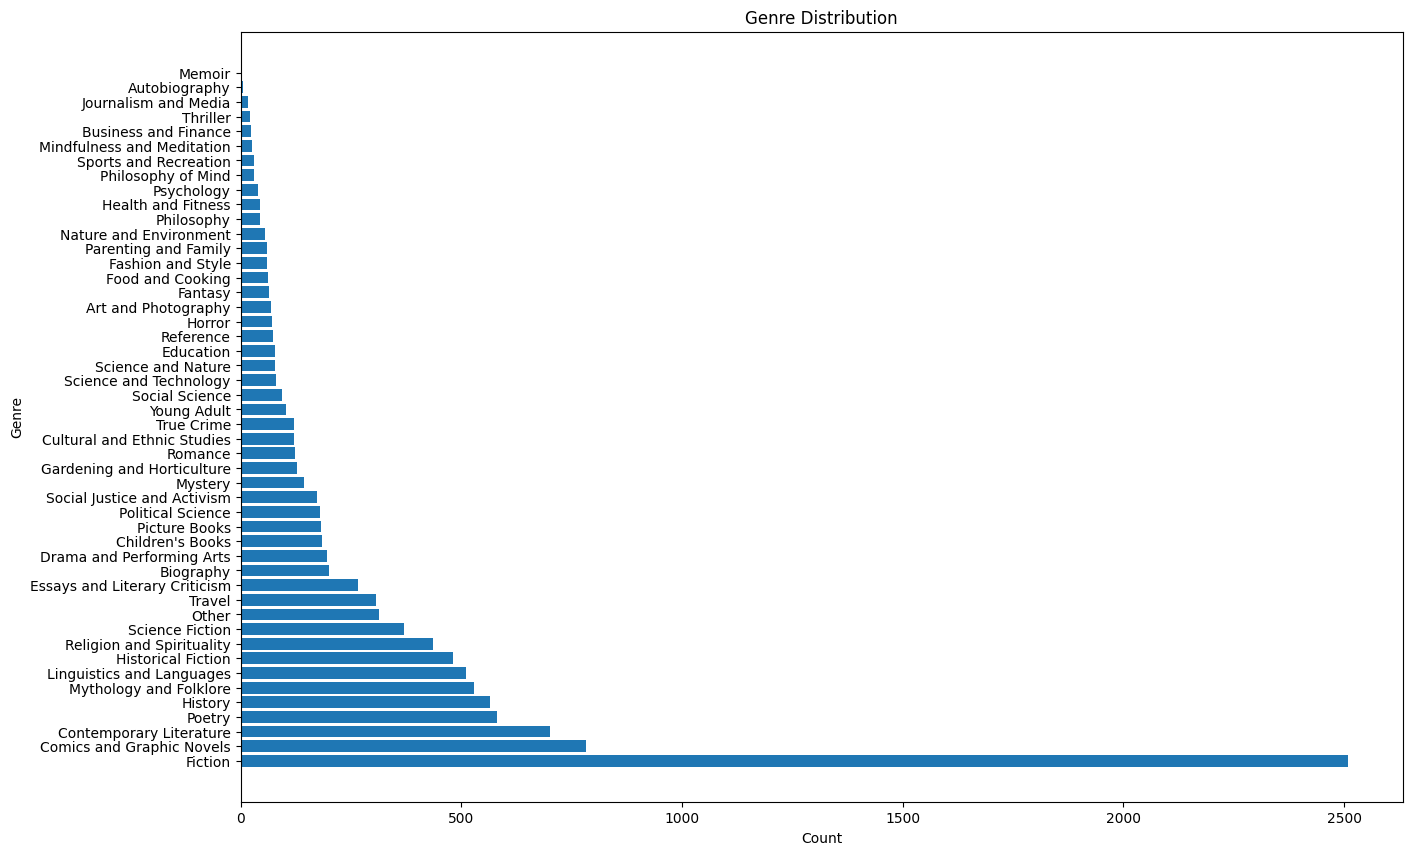

In [7]:
import matplotlib.pyplot as plt

# Assuming genre_counts is a dictionary containing your genre distribution
genres = df.Genre.value_counts().index
counts = df.Genre.value_counts().values

plt.figure(figsize=(15, 10))
plt.barh(genres, counts)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Genre Distribution')
plt.show()


In [8]:
# from tqdm import tqdm
# tqdm.pandas()
# df['Content_Char_Length'] = df['Content'].progress_apply(len)


In [9]:
# # df.Content.isna().drop()

In [10]:
df[df.Content.isna()==1].index

Index([173, 175, 185, 229, 240, 241, 268, 629, 2433, 7862, 7863, 10126, 10207], dtype='int64')

In [11]:
df.drop(df[df.Content.isna()==1].index,axis=0,inplace=True)

In [12]:
df.Content.isna().sum()

0

In [13]:
from tqdm import tqdm
tqdm.pandas()
df['Content_Char_Length'] = df['Content'].progress_apply(len)


100%|██████████| 11332/11332 [00:00<00:00, 725458.32it/s]


In [14]:
df['Content_Word_Length'] = df['Content'].progress_apply(lambda x: len(str(x).split(' ')))


100%|██████████| 11332/11332 [00:42<00:00, 265.86it/s]


In [15]:
df

,Title,Genre,Content,Language,Content_Char_Length,Content_Word_Length
0,The Declaration of Independence of the United ...,History,All of the original files are included in the ...,English,16830,2803
1,The King James Version of the Bible,Religion and Spirituality,Exodus The Third Book of Moses: Called Levitic...,English,4139636,789956
2,The Complete Works of William Shakespeare,Drama and Performing Arts,William Shakespeare Contents THE SONNETS ALL’S...,English,5287942,972334
3,The Magna Carta,Linguistics and Languages,preparer of the 0.1 version. some of which wer...,English,79272,14377
4,Apocolocyntosis,Religion and Spirituality,"H. D. Rouse Release date : November 1, ROUSE, ...",English,29568,5544
...,...,...,...,...,...,...
11340,A Biographical Sketch of the Life and Characte...,Other,Produced by John Young Le Bourgeois A BIOGRAPH...,English,256895,46405
11341,"Rub iy t of Omar Khayy m, and Sal m n and Abs ...",Linguistics and Languages,by Edward FitzGerald. no cost and with almost ...,English,117527,21184
11342,"Jane Austen, Her Life and Letters: A Family Re...",History,Chapter I AUSTENS AND LEIGHS 1600-1764 At the ...,English,749846,135954
11343,Mr Dooley in Peace and in War,Comics and Graphic Novels,"Graeme Mackreth, DOOLEY In Peace and in War Bo...",English,238352,44090


## Text Length Analysis

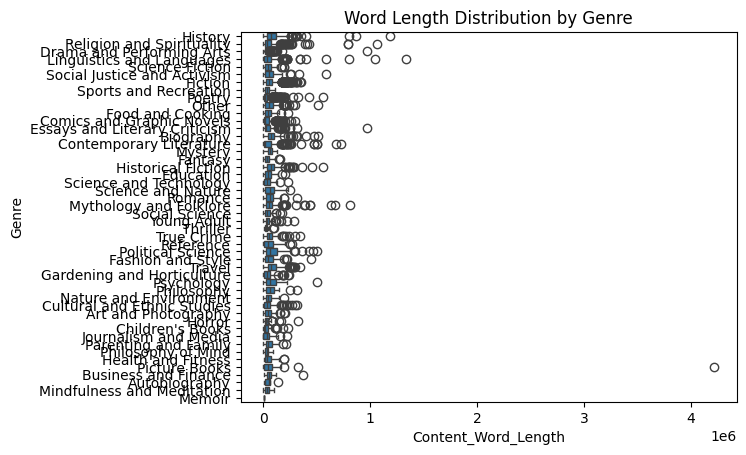

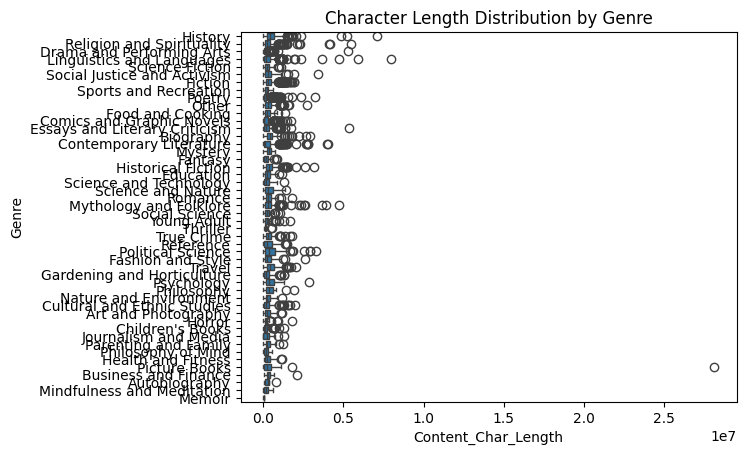

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Content_Word_Length', y='Genre', data=df)
plt.title('Word Length Distribution by Genre')
plt.show()

sns.boxplot(x='Content_Char_Length', y='Genre', data=df)
plt.title('Character Length Distribution by Genre')
plt.show()


In [17]:
# from collections import Counter

# # Assuming df['Content'] contains the book contents
# word_freq = Counter(" ".join(df["Content"]).split())
# most_common_words = word_freq.most_common(10)
# least_common_words = word_freq.most_common()[:-11:-1]


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer for content
tokenizer_content = Tokenizer()

# Transform the text to sequences
df['Tokenized_Content'] = df['Content'].progress_apply(lambda x: tokenizer_content.texts_to_sequences([x])[0])


100%|██████████| 11332/11332 [10:24<00:00, 18.14it/s]


In [20]:
# Initialize the tokenizer for titles
tokenizer_title = Tokenizer()
tokenizer_title.fit_on_texts(df['Title'])

# Transform the titles to sequences
df['Tokenized_Title'] = df['Title'].progress_apply(lambda x: tokenizer_title.texts_to_sequences([x])[0])


100%|██████████| 11332/11332 [00:00<00:00, 90606.92it/s]


In [21]:
# Initialize the tokenizer for genre
tokenizer_genre = Tokenizer()
tokenizer_genre.fit_on_texts(df['Genre'])

# Transform the genre to sequences
df['Tokenized_Genre'] = df['Genre'].progress_apply(lambda x: tokenizer_genre.texts_to_sequences([x])[0][0])  # Taking the first element as it will be a single integer

# Initialize the tokenizer for language
tokenizer_language = Tokenizer()
tokenizer_language.fit_on_texts(df['Language'])

# Transform the language to sequences
df['Tokenized_Language'] = df['Language'].progress_apply(lambda x: tokenizer_language.texts_to_sequences([x])[0][0])  # Taking the first element as it will be a single integer


100%|██████████| 11332/11332 [00:00<00:00, 160430.74it/s]


In [22]:
df

,Title,Genre,Content,Language,Content_Char_Length,Content_Word_Length,Tokenized_Content,Tokenized_Title,Tokenized_Genre,Tokenized_Language
0,The Declaration of Independence of the United ...,History,All of the original files are included in the ...,English,16830,2803,"[32, 2, 1, 1024, 12646, 36, 3338, 6, 1, 103, 6...","[1, 1657, 2, 815, 2, 1, 90, 88, 2, 120]",10,1
1,The King James Version of the Bible,Religion and Spirituality,Exodus The Third Book of Moses: Called Levitic...,English,4139636,789956,"[17077, 1, 633, 378, 2, 3478, 194, 41795, 1, 1...","[1, 114, 310, 1463, 2, 1, 571]",16,1
2,The Complete Works of William Shakespeare,Drama and Performing Arts,William Shakespeare Contents THE SONNETS ALL’S...,English,5287942,972334,"[622, 3559, 2375, 1, 12208, 48650, 92, 7, 1971...","[1, 166, 54, 2, 118, 690]",26,1
3,The Magna Carta,Linguistics and Languages,preparer of the 0.1 version. some of which wer...,English,79272,14377,"[153097, 2, 1, 632, 183, 4687, 62, 2, 26, 34, ...","[1, 5743, 5744]",13,1
4,Apocolocyntosis,Religion and Spirituality,"H. D. Rouse Release date : November 1, ROUSE, ...",English,29568,5544,"[625, 626, 8331, 4746, 1614, 2091, 183, 8331, ...",[5745],16,1
...,...,...,...,...,...,...,...,...,...,...
11340,A Biographical Sketch of the Life and Characte...,Other,Produced by John Young Le Bourgeois A BIOGRAPH...,English,256895,46405,"[1064, 22, 300, 166, 1249, 14376, 5, 14238, 41...","[4, 821, 337, 2, 1, 15, 3, 265, 2, 2123, 13446...",19,1
11341,"Rub iy t of Omar Khayy m, and Sal m n and Abs ...",Linguistics and Languages,by Edward FitzGerald. no cost and with almost ...,English,117527,21184,"[22, 1382, 11047, 45, 1450, 3, 14, 243, 45, 98...","[13448, 13449, 957, 2, 13450, 13451, 344, 3, 1...",13,1
11342,"Jane Austen, Her Life and Letters: A Family Re...",History,Chapter I AUSTENS AND LEIGHS 1600-1764 At the ...,English,749846,135954,"[346, 10, 89284, 3, 147364, 19815, 24513, 23, ...","[1083, 5412, 168, 15, 3, 60, 4, 423, 432]",10,1
11343,Mr Dooley in Peace and in War,Comics and Graphic Novels,"Graeme Mackreth, DOOLEY In Peace and in War Bo...",English,238352,44090,"[33078, 301872, 32454, 6, 533, 3, 6, 256, 2168...","[203, 3355, 5, 419, 3, 5, 38]",4,1


# Update Tokenizer
* If you want to include new tokens from the additional dataset, you can update the existing tokenizer. Make sure to retrain your model if the vocabulary size changes.



In [ ]:
# Update the tokenizer with new data
loaded_tokenizer.fit_on_texts(new_data)

#  Reserve Tokens for Future Use
* You can reserve a set of token IDs for words that might appear in future datasets. This way, you can extend your tokenizer without affecting the existing tokens.



In [ ]:
# Initialize tokenizer with num_words reduced by the number of reserved tokens
tokenizer = Tokenizer(num_words=(vocab_size - num_reserved_tokens))

In [25]:
# Create a list to store sequences
content_sequences = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    tokenized_content = row['Tokenized_Content']
    for i in range(1, len(tokenized_content)):
        sequence = tokenized_content[max(0, i - 5):i+1]
        content_sequences.append(sequence)

# Now, content_sequences contains all the sequences



KeyboardInterrupt



In [36]:
location='C:/Users/RohanRVC/Documents/Business/E-books/E_Books_Unknown_AI/LSTM/Token/token_1'
import pickle

# Save tokenizer for 'Content'
with open(f'{location}/tokenizer_content.pickle', 'wb') as handle:
    pickle.dump(tokenizer_content, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save tokenizer for 'Title'
with open(f'{location}/tokenizer_title.pickle', 'wb') as handle:
    pickle.dump(tokenizer_title, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save tokenizer for 'Genre'
with open(f'{location}/tokenizer_genre.pickle', 'wb') as handle:
    pickle.dump(tokenizer_genre, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save tokenizer for 'Language'
with open(f'{location}/tokenizer_language.pickle', 'wb') as handle:
    pickle.dump(tokenizer_language, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [44]:
tokenizer_content.index_word

3249945

In [45]:
location='C:/Users/RohanRVC/Documents/Business/E-books/E_Books_Unknown_AI/LSTM/Token/token_1'

# Load tokenizers
with open(f'{location}/tokenizer_content.pickle', 'rb') as handle:
    loaded_tokenizer_content = pickle.load(handle)

with open(f'{location}/tokenizer_title.pickle', 'rb') as handle:
    loaded_tokenizer_title = pickle.load(handle)

with open(f'{location}/tokenizer_genre.pickle', 'rb') as handle:
    loaded_tokenizer_genre = pickle.load(handle)

with open(f'{location}/tokenizer_language.pickle', 'rb') as handle:
    loaded_tokenizer_language = pickle.load(handle)


# Sequence Modeling using LSTMs
* **Inputs**: Your model takes four different kinds of inputs: content, title, genre, and language. Each of these inputs goes through different processing layers.

* **Embedding Layers**: The content and title inputs are passed through Embedding layers, converting them to dense vectors of fixed size (64 dimensions in this case).

* **LSTM Layers**: After embedding, both the content and title are processed by LSTM layers with 128 units. This should allow the model to capture sequential dependencies in both the content and title.

* **Concatenation**: The outputs of the LSTM layers are then concatenated with the genre and language inputs. This creates a combined feature vector that includes information from all four inputs.

* **Dense Layers**: The concatenated features are then processed by Dense layers for final prediction.

* **Output**: The output layer uses a softmax activation function, suggesting that you're treating this as a multi-class classification problem.

* **Optimization**: The model is compiled using the Adam optimizer and categorical cross-entropy loss function, which is typical for multi-class classification problems.

In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate, Input

# Define inputs
input_content = Input(shape=(None,), name='content')
input_title = Input(shape=(None,), name='title')
input_genre = Input(shape=(1,), name='genre')
input_language = Input(shape=(1,), name='language')

vocab_size_content = len(tokenizer_content.word_index) + 1  # +1 for padding token
vocab_size_title = len(tokenizer_title.word_index) + 1  # +1 for padding token

# Embedding layers for 'Content' and 'Title'
embedding_content = Embedding(input_dim=vocab_size_content, output_dim=64)(input_content)
embedding_title = Embedding(input_dim=vocab_size_title, output_dim=64)(input_title)

# LSTM layers for 'Content' and 'Title'
lstm_content = LSTM(128)(embedding_content)
lstm_title = LSTM(128)(embedding_title)

# Combine all inputs
concat = Concatenate()([lstm_content, lstm_title, input_genre, input_language])

# Dense layers for final prediction
output = Dense(128, activation='relu')(concat)
output = Dense(vocab_size_content, activation='softmax')(output)

# Compile the model
model = Model(inputs=[input_content, input_title, input_genre, input_language], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
# Convert the tokenized sequences from DataFrame columns to lists
X_content = df['Tokenized_Content'].tolist()
X_title = df['Tokenized_Title'].tolist()
X_genre = df['Tokenized_Genre'].tolist()
X_language = df['Tokenized_Language'].tolist()


In [53]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets with stratification on 'Genre'
X_content_train, X_content_val, X_genre_train, X_genre_val = train_test_split(
    X_content, X_genre, test_size=0.2, random_state=42, stratify=X_genre
)
X_title_train, X_title_val = train_test_split(
    X_title, test_size=0.2, random_state=42, stratify=X_genre
)
X_language_train, X_language_val = train_test_split(
    X_language, test_size=0.2, random_state=42, stratify=X_genre
)

* **epochs** specifies the number of times the learning algorithm will work through the entire training dataset. You can adjust this number based on your observation of the model's performance.
* **batch_size** is the number of samples per gradient update for training the model. Again, you can adjust this based on your specific needs or limitations.
* **validation_data** is the data on which to evaluate the loss and any model metrics at the end of each epoch.

* The **fit** method will return a History object that contains all information collected during training. You can use this to plot training and validation accuracy and loss, which can give you insights into overfitting or underfitting, among other things.



In [54]:

# Train the model
history = model.fit(
    [X_content_train, X_title_train, X_genre_train, X_language_train],  # Training features
    epochs=10,  # Number of epochs: You can adjust this
    batch_size=32,  # Batch size: You can adjust this
    validation_data=([X_content_val, X_title_val, X_genre_val, X_language_val]),  # Validation data
    verbose=1  # Verbosity mode

)   #next time also add limit Callbacks


In [ ]:
model.save('C:/Users/RohanRVC/Documents/Business/E-books/E_Books_Unknown_AI/LSTM/Model/model_1/model.h5')
